# import libraries

In [37]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt


# extract and safe combined data (raw)

In [23]:
raw_weather_solo = "/home/phillip/Dokumente/repositories/ds1_weather_data_ger/database/raw_data_weather"
output_path = "/home/phillip/Dokumente/repositories/ds1_weather_data_ger/data_preparation_and_transformation"

os.chdir(raw_weather_solo)

extension = 'txt'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv_raw = pd.concat([pd.read_csv(f) for f in all_filenames])
combined_csv_raw.to_csv(os.path.join(output_path, "combined_data_raw.csv"), index=False, encoding='utf-8-sig')

# explore data

**read in data in pd df**

In [38]:
combined_data_raw_path = "/home/phillip/Dokumente/repositories/ds1_weather_data_ger/data_preparation_and_transformation/combined_data_raw.csv"

df_combdata_raw = pd.read_csv(combined_data_raw_path, 
    sep=';', 
    skipinitialspace=True)

**explore columns and structures**

In [39]:
#show number of columns and rows
df_combdata_raw.shape

# show column names and data types
df_combdata_raw.info() 

#show column names and first values of dataframe
df_combdata_raw.head() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATIONS_ID  3850 non-null   int64  
 1   MESS_DATUM   3850 non-null   int64  
 2   QN_3         3850 non-null   int64  
 3   FX           3850 non-null   float64
 4   FM           3850 non-null   float64
 5   QN_4         3850 non-null   int64  
 6   RSK          3850 non-null   float64
 7   RSKF         3850 non-null   int64  
 8   SDK          3850 non-null   float64
 9   SHK_TAG      3850 non-null   int64  
 10  NM           3850 non-null   float64
 11  VPM          3850 non-null   float64
 12  PM           3850 non-null   float64
 13  TMK          3850 non-null   float64
 14  UPM          3850 non-null   float64
 15  TXK          3850 non-null   float64
 16  TNK          3850 non-null   float64
 17  TGK          3850 non-null   float64
 18  eor          3850 non-null   object 
dtypes: flo

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,1975,20211211,10,7.7,-999.0,3,0.9,6,0.1,0,-999.0,6.1,-999.00,2.5,84.08,4.8,-0.3,-2.4,eor
1,1975,20211212,10,9.6,3.9,3,2.4,6,0.0,0,8.0,8.7,-999.00,5.2,97.13,8.3,1.7,1.7,eor
2,1975,20211213,10,7.2,3.2,3,0.5,6,0.0,0,7.8,11.2,1022.55,9.3,95.25,10.6,7.7,6.8,eor
3,1975,20211214,10,9.8,3.7,3,0.5,6,0.0,0,7.8,10.2,1022.80,8.1,94.29,8.7,7.5,5.9,eor
4,1975,20211215,10,10.3,4.3,3,0.0,6,0.0,0,7.5,10.6,1025.53,9.7,88.33,10.6,8.4,7.3,eor


**plot sample data**

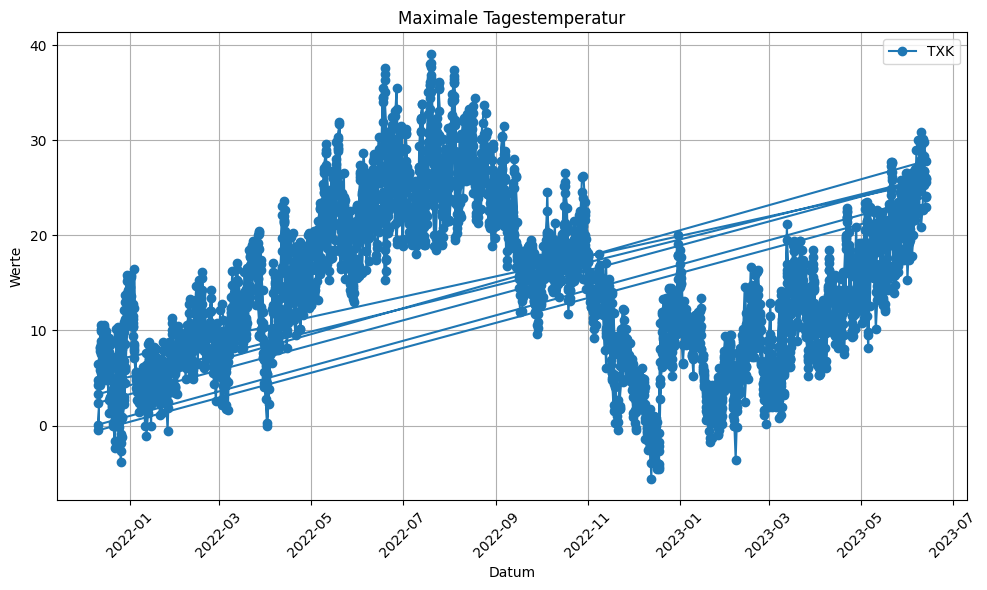

In [49]:
# create plot (optional)
plt.figure(figsize=(10, 6))  # Größe des Plots festlegen (optional)

# Spalte1 plotten
plt.plot(df_combdata_raw['MESS_DATUM'], df_combdata_raw['TXK'], label='TXK', marker='o')



# Achsenbeschriftungen und Titel hinzufügen (optional)
plt.xlabel('Datum')
plt.ylabel('Werte')
plt.title('Maximale Tagestemperatur')

# Legende hinzufügen
plt.legend()

# Plot anzeigen
plt.grid(True)  # Gitterlinien anzeigen (optional)
plt.xticks(rotation=45)  # x-Achsentick-Beschriftungen drehen (optional)
plt.tight_layout()  # Plot-Layout optimieren (optional)
plt.show()


# data transformation

**change data types**

In [48]:
df_combdata_raw['MESS_DATUM'] = pd.to_datetime(df_combdata_raw['MESS_DATUM'], format='%Y%m%d')
#print(df_combdata_raw)
print(df_combdata_raw.dtypes)


STATIONS_ID             int64
MESS_DATUM     datetime64[ns]
QN_3                    int64
FX                    float64
FM                    float64
QN_4                    int64
RSK                   float64
RSKF                    int64
SDK                   float64
SHK_TAG                 int64
NM                    float64
VPM                   float64
PM                    float64
TMK                   float64
UPM                   float64
TXK                   float64
TNK                   float64
TGK                   float64
eor                    object
dtype: object


**rename columns**

In [29]:

#column meanings:
#STATIONS_ID Station ID VARCHAR2
#MESS_DATUM Referenzdatum NUMBER YYYYMMDD
#QN_3 Qualitaetsniveau der nachfolgenden Spalten NUMBER numerical code
#FX Tagesmaximum Windspitze m/s NUMBER 9990.0
#FM Tagesmittel Windgeschwindigkeit m/s NUMBER 9990.0
#QN_4 Qualitaetsniveau der nachfolgenden Spalten NUMBER numerical code
#RSK tägliche Niederschlagshöhe mm NUMBER 9990.0
#RSKF Niederschlagsform numerical code NUMBER
#SDK tägliche Sonnenscheindauer h NUMBER 9990.0
#SHK_TAG Tageswert Schneehöhe cm NUMBER 9990.0
#NM Tagesmittel des Bedeckungsgrades 1/8 NUMBER 9990.0
#VPM Tagesmittel des Dampfdruckes hPa NUMBER 9990.0
#PM Tagesmittel des Luftdrucks hPa NUMBER 9990.0
#TMK Tagesmittel der Lufttemperatur in 2m Höhe °C NUMBER 9990.0
#UPM Tagesmittel der Relativen Feuchte % NUMBER 9990.0
#TXK Tagesmaximum der Lufttemperatur in 2m Höhe °C NUMBER 9990.0
#TNK Tagesminimum der Lufttemperatur in 2m Höhe °C NUMBER 9990.0
#TGK Minimum der Lufttemperatur am Minimum der Lufttemperatur am Erdboden in 5cm Höhe


df_combdata.drop(['NM','VPM','PM','eor'], axis=1, inplace=True)

df_combdata.rename(columns={
    'QN_3':'Datenqualität Reihe WInd', 
    'FX':'Max Windgeschwindigkeit [m/s]',
    'FM':'Mittel Windgeschwindigkeit [m/s]',
    'QN_4':'Datenqualität Reihe Wetter',
    'RSK':'Niederschlagshöhe [mm]',
    'RSKF':'Niederschlagsform',
    'SDK':'Sonnenscheindauer [h]',
    'SHK_TAG':'Schneehöhe [cm]'
    }, inplace=True)

print(df_combdata.head())

   STATIONS_ID  MESS_DATUM  Datenqualität Reihe WInd  \
0          427    20211211                        10   
1          427    20211212                        10   
2          427    20211213                        10   
3          427    20211214                        10   
4          427    20211215                        10   

   Max Windgeschwindigkeit [m/s]  Mittel Windgeschwindigkeit [m/s]  \
0                            6.2                               2.5   
1                            6.9                               3.2   
2                            5.0                               2.5   
3                            6.2                               3.4   
4                            6.7                               4.0   

   Datenqualität Reihe Wetter  Niederschlagshöhe [mm]  Niederschlagsform  \
0                           3                     0.0                  0   
1                           3                     0.6                  6   
2             